In [1]:
from keras import models, layers, optimizers, losses, metrics, datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# Load the Reuters '86 newswire dataset
(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10_000)

   8192/2110848 [..............................] - ETA: 10s

  40960/2110848 [..............................] - ETA: 5s 

 106496/2110848 [>.............................] - ETA: 3s

 196608/2110848 [=>............................] - ETA: 2s

 278528/2110848 [==>...........................] - ETA: 2s

 442368/2110848 [=====>........................] - ETA: 1s

 614400/2110848 [=======>......................] - ETA: 1s

 786432/2110848 [==========>...................] - ETA: 0s

1155072/2110848 [===============>..............] - ETA: 0s

1449984/2110848 [===================>..........] - ETA: 0s



1884160/2110848 [=========================>....] - ETA: 0s

2113536/2110848 [==============================] - 1s 0us/step


In [4]:
# Build the index => word translation dictionary and print an example from the dataset
word_index = {value - 3: key for (key, value) in datasets.reuters.get_word_index().items()}
example = ' '.join([word_index.get(idx, '?????') for idx in train_data[0]])
print(example)

  8192/550378 [..............................] - ETA: 2s

 40960/550378 [=>............................] - ETA: 1s

 73728/550378 [===>..........................] - ETA: 1s



139264/550378 [======>.......................] - ETA: 0s

262144/550378 [=============>................] - ETA: 0s



352256/550378 [==================>...........] - ETA: 0s

524288/550378 [===========================>..] - ETA: 0s

557056/550378 [==============================] - 0s 1us/step


in said said vs company it intervention mln with department gain mln afg over from previous west price new for more mln its exchange 3 its japan on price new per at above 2 for last a are vs hit not analysts 11 3 earlier 3 1987 reuter on at because reuter on for last dlrs pipe swiss germany 3 buy 3 state reuter on at rates which reuter on from vs imports john price new or billion analysts he s rose 3 we on is 000


In [5]:
# Vectorize word index sequences into binary encoded matrices
def vectorize_sequences(sequences, dimension=10_000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# One-hot encode labels
def one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = one_hot(train_labels)
one_hot_test_labels = one_hot(test_labels)

In [10]:
# Validation and training split of data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
# Construct and train a fully connected model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20


 512/7982 [>.............................] - ETA: 5s - loss: 3.8035 - categorical_accuracy: 0.0898

1024/7982 [==>...........................] - ETA: 2s - loss: 3.7253 - categorical_accuracy: 0.2539

1536/7982 [====>.........................] - ETA: 2s - loss: 3.6166 - categorical_accuracy: 0.3040



2048/7982 [======>.......................] - ETA: 1s - loss: 3.5038 - categorical_accuracy: 0.3330

2560/7982 [========>.....................] - ETA: 1s - loss: 3.3865 - categorical_accuracy: 0.3605



3072/7982 [==========>...................] - ETA: 1s - loss: 3.2659 - categorical_accuracy: 0.3932

3584/7982 [============>.................] - ETA: 0s - loss: 3.1765 - categorical_accuracy: 0.4093

4096/7982 [==============>...............] - ETA: 0s - loss: 3.0838 - categorical_accuracy: 0.4229

4608/7982 [================>.............] - ETA: 0s - loss: 2.9931 - categorical_accuracy: 0.4347

5120/7982 [==================>...........] - ETA: 0s - loss: 2.9026 - categorical_accuracy: 0.4467

5632/7982 [====================>.........] - ETA: 0s - loss: 2.8255 - categorical_accuracy: 0.4531



6144/7982 [======================>.......] - ETA: 0s - loss: 2.7499 - categorical_accuracy: 0.4614



6656/7982 [========================>.....] - ETA: 0s - loss: 2.6779 - categorical_accuracy: 0.4727

7168/7982 [=========================>....] - ETA: 0s - loss: 2.6174 - categorical_accuracy: 0.4814

7680/7982 [===========================>..] - ETA: 0s - loss: 2.5629 - categorical_accuracy: 0.4910

7982/7982 [==============================] - 1s 182us/step - loss: 2.5322 - categorical_accuracy: 0.4955 - val_loss: 1.7208 - val_categorical_accuracy: 0.6120


Epoch 2/20


 512/7982 [>.............................] - ETA: 0s - loss: 1.5152 - categorical_accuracy: 0.6836

1024/7982 [==>...........................] - ETA: 0s - loss: 1.5690 - categorical_accuracy: 0.6611

1536/7982 [====>.........................] - ETA: 0s - loss: 1.5477 - categorical_accuracy: 0.6680

2048/7982 [======>.......................] - ETA: 0s - loss: 1.5688 - categorical_accuracy: 0.6641

2560/7982 [========>.....................] - ETA: 0s - loss: 1.5509 - categorical_accuracy: 0.6711

3072/7982 [==========>...................] - ETA: 0s - loss: 1.5444 - categorical_accuracy: 0.6686

3584/7982 [============>.................] - ETA: 0s - loss: 1.5250 - categorical_accuracy: 0.6747

4096/7982 [==============>...............] - ETA: 0s - loss: 1.5113 - categorical_accuracy: 0.6770

4608/7982 [================>.............] - ETA: 0s - loss: 1.5074 - categorical_accuracy: 0.6771

5120/7982 [==================>...........] - ETA: 0s - loss: 1.4966 - categorical_accuracy: 0.6809

5632/7982 [====================>.........] - ETA: 0s - loss: 1.4803 - categorical_accuracy: 0.6829

6144/7982 [======================>.......] - ETA: 0s - loss: 1.4794 - categorical_accuracy: 0.6820

6656/7982 [========================>.....] - ETA: 0s - loss: 1.4690 - categorical_accuracy: 0.6839

7168/7982 [=========================>....] - ETA: 0s - loss: 1.4602 - categorical_accuracy: 0.6861

7680/7982 [===========================>..] - ETA: 0s - loss: 1.4515 - categorical_accuracy: 0.6871

7982/7982 [==============================] - 1s 131us/step - loss: 1.4452 - categorical_accuracy: 0.6879 - val_loss: 1.3459 - val_categorical_accuracy: 0.7060


Epoch 3/20


 512/7982 [>.............................] - ETA: 0s - loss: 1.2179 - categorical_accuracy: 0.7285

1024/7982 [==>...........................] - ETA: 0s - loss: 1.2025 - categorical_accuracy: 0.7363

1536/7982 [====>.........................] - ETA: 0s - loss: 1.1966 - categorical_accuracy: 0.7441

2048/7982 [======>.......................] - ETA: 0s - loss: 1.1718 - categorical_accuracy: 0.7461

2560/7982 [========>.....................] - ETA: 0s - loss: 1.1366 - categorical_accuracy: 0.7566

3072/7982 [==========>...................] - ETA: 0s - loss: 1.1290 - categorical_accuracy: 0.7627

3584/7982 [============>.................] - ETA: 0s - loss: 1.1531 - categorical_accuracy: 0.7570

4096/7982 [==============>...............] - ETA: 0s - loss: 1.1423 - categorical_accuracy: 0.7581

4608/7982 [================>.............] - ETA: 0s - loss: 1.1257 - categorical_accuracy: 0.7602

5120/7982 [==================>...........] - ETA: 0s - loss: 1.1170 - categorical_accuracy: 0.7619

5632/7982 [====================>.........] - ETA: 0s - loss: 1.1130 - categorical_accuracy: 0.7624

6144/7982 [======================>.......] - ETA: 0s - loss: 1.1075 - categorical_accuracy: 0.7627

6656/7982 [========================>.....] - ETA: 0s - loss: 1.1032 - categorical_accuracy: 0.7635

7168/7982 [=========================>....] - ETA: 0s - loss: 1.1015 - categorical_accuracy: 0.7644

7680/7982 [===========================>..] - ETA: 0s - loss: 1.0968 - categorical_accuracy: 0.7647

7982/7982 [==============================] - 1s 131us/step - loss: 1.0953 - categorical_accuracy: 0.7651 - val_loss: 1.1708 - val_categorical_accuracy: 0.7430


Epoch 4/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.8880 - categorical_accuracy: 0.8242

1024/7982 [==>...........................] - ETA: 0s - loss: 0.8614 - categorical_accuracy: 0.8232

1536/7982 [====>.........................] - ETA: 0s - loss: 0.9040 - categorical_accuracy: 0.8079

2048/7982 [======>.......................] - ETA: 0s - loss: 0.8927 - categorical_accuracy: 0.8159

2560/7982 [========>.....................] - ETA: 0s - loss: 0.8960 - categorical_accuracy: 0.8117

3072/7982 [==========>...................] - ETA: 0s - loss: 0.8877 - categorical_accuracy: 0.8145

3584/7982 [============>.................] - ETA: 0s - loss: 0.8853 - categorical_accuracy: 0.8158

4096/7982 [==============>...............] - ETA: 0s - loss: 0.8984 - categorical_accuracy: 0.8105

4608/7982 [================>.............] - ETA: 0s - loss: 0.9095 - categorical_accuracy: 0.8079

5120/7982 [==================>...........] - ETA: 0s - loss: 0.8947 - categorical_accuracy: 0.8115

5632/7982 [====================>.........] - ETA: 0s - loss: 0.8888 - categorical_accuracy: 0.8111

6144/7982 [======================>.......] - ETA: 0s - loss: 0.8799 - categorical_accuracy: 0.8135

6656/7982 [========================>.....] - ETA: 0s - loss: 0.8760 - categorical_accuracy: 0.8146

7168/7982 [=========================>....] - ETA: 0s - loss: 0.8764 - categorical_accuracy: 0.8145

7680/7982 [===========================>..] - ETA: 0s - loss: 0.8718 - categorical_accuracy: 0.8158

7982/7982 [==============================] - 1s 131us/step - loss: 0.8697 - categorical_accuracy: 0.8165 - val_loss: 1.0793 - val_categorical_accuracy: 0.7590


Epoch 5/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.7680 - categorical_accuracy: 0.8320

1024/7982 [==>...........................] - ETA: 0s - loss: 0.7529 - categorical_accuracy: 0.8379

1536/7982 [====>.........................] - ETA: 0s - loss: 0.7555 - categorical_accuracy: 0.8411

2048/7982 [======>.......................] - ETA: 0s - loss: 0.7242 - categorical_accuracy: 0.8477

2560/7982 [========>.....................] - ETA: 0s - loss: 0.7099 - categorical_accuracy: 0.8488

3072/7982 [==========>...................] - ETA: 0s - loss: 0.7268 - categorical_accuracy: 0.8421

3584/7982 [============>.................] - ETA: 0s - loss: 0.7151 - categorical_accuracy: 0.8443

4096/7982 [==============>...............] - ETA: 0s - loss: 0.7101 - categorical_accuracy: 0.8459

4608/7982 [================>.............] - ETA: 0s - loss: 0.7096 - categorical_accuracy: 0.8451

5120/7982 [==================>...........] - ETA: 0s - loss: 0.7168 - categorical_accuracy: 0.8432

5632/7982 [====================>.........] - ETA: 0s - loss: 0.7127 - categorical_accuracy: 0.8441

6144/7982 [======================>.......] - ETA: 0s - loss: 0.7098 - categorical_accuracy: 0.8454

6656/7982 [========================>.....] - ETA: 0s - loss: 0.7105 - categorical_accuracy: 0.8451

7168/7982 [=========================>....] - ETA: 0s - loss: 0.7033 - categorical_accuracy: 0.8471

7680/7982 [===========================>..] - ETA: 0s - loss: 0.7056 - categorical_accuracy: 0.8458

7982/7982 [==============================] - 1s 132us/step - loss: 0.7034 - categorical_accuracy: 0.8472 - val_loss: 0.9844 - val_categorical_accuracy: 0.7810


Epoch 6/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.6030 - categorical_accuracy: 0.8770

1024/7982 [==>...........................] - ETA: 0s - loss: 0.6032 - categorical_accuracy: 0.8740

1536/7982 [====>.........................] - ETA: 0s - loss: 0.5805 - categorical_accuracy: 0.8783

2048/7982 [======>.......................] - ETA: 0s - loss: 0.5748 - categorical_accuracy: 0.8813

2560/7982 [========>.....................] - ETA: 0s - loss: 0.5671 - categorical_accuracy: 0.8816

3072/7982 [==========>...................] - ETA: 0s - loss: 0.5716 - categorical_accuracy: 0.8796

3584/7982 [============>.................] - ETA: 0s - loss: 0.5652 - categorical_accuracy: 0.8817

4096/7982 [==============>...............] - ETA: 0s - loss: 0.5670 - categorical_accuracy: 0.8821

4608/7982 [================>.............] - ETA: 0s - loss: 0.5679 - categorical_accuracy: 0.8817

5120/7982 [==================>...........] - ETA: 0s - loss: 0.5657 - categorical_accuracy: 0.8809

5632/7982 [====================>.........] - ETA: 0s - loss: 0.5664 - categorical_accuracy: 0.8819

6144/7982 [======================>.......] - ETA: 0s - loss: 0.5653 - categorical_accuracy: 0.8810

6656/7982 [========================>.....] - ETA: 0s - loss: 0.5649 - categorical_accuracy: 0.8809

7168/7982 [=========================>....] - ETA: 0s - loss: 0.5676 - categorical_accuracy: 0.8797

7680/7982 [===========================>..] - ETA: 0s - loss: 0.5671 - categorical_accuracy: 0.8798

7982/7982 [==============================] - 1s 131us/step - loss: 0.5667 - categorical_accuracy: 0.8802 - val_loss: 0.9411 - val_categorical_accuracy: 0.8040


Epoch 7/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.4726 - categorical_accuracy: 0.9023

1024/7982 [==>...........................] - ETA: 0s - loss: 0.4714 - categorical_accuracy: 0.9062

1536/7982 [====>.........................] - ETA: 0s - loss: 0.4741 - categorical_accuracy: 0.9004

2048/7982 [======>.......................] - ETA: 0s - loss: 0.4834 - categorical_accuracy: 0.8984

2560/7982 [========>.....................] - ETA: 0s - loss: 0.4910 - categorical_accuracy: 0.8992

3072/7982 [==========>...................] - ETA: 0s - loss: 0.4768 - categorical_accuracy: 0.9020

3584/7982 [============>.................] - ETA: 0s - loss: 0.4655 - categorical_accuracy: 0.9035

4096/7982 [==============>...............] - ETA: 0s - loss: 0.4587 - categorical_accuracy: 0.9045

4608/7982 [================>.............] - ETA: 0s - loss: 0.4652 - categorical_accuracy: 0.9030

5120/7982 [==================>...........] - ETA: 0s - loss: 0.4656 - categorical_accuracy: 0.9047

5632/7982 [====================>.........] - ETA: 0s - loss: 0.4680 - categorical_accuracy: 0.9047

6144/7982 [======================>.......] - ETA: 0s - loss: 0.4649 - categorical_accuracy: 0.9046

6656/7982 [========================>.....] - ETA: 0s - loss: 0.4652 - categorical_accuracy: 0.9043

7168/7982 [=========================>....] - ETA: 0s - loss: 0.4637 - categorical_accuracy: 0.9043

7680/7982 [===========================>..] - ETA: 0s - loss: 0.4580 - categorical_accuracy: 0.9048

7982/7982 [==============================] - 1s 132us/step - loss: 0.4581 - categorical_accuracy: 0.9048 - val_loss: 0.9083 - val_categorical_accuracy: 0.8020


Epoch 8/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.3967 - categorical_accuracy: 0.9199

1024/7982 [==>...........................] - ETA: 0s - loss: 0.3959 - categorical_accuracy: 0.9189

1536/7982 [====>.........................] - ETA: 0s - loss: 0.3774 - categorical_accuracy: 0.9219

2048/7982 [======>.......................] - ETA: 0s - loss: 0.3787 - categorical_accuracy: 0.9233

2560/7982 [========>.....................] - ETA: 0s - loss: 0.3723 - categorical_accuracy: 0.9227

3072/7982 [==========>...................] - ETA: 0s - loss: 0.3740 - categorical_accuracy: 0.9238

3584/7982 [============>.................] - ETA: 0s - loss: 0.3715 - categorical_accuracy: 0.9247

4096/7982 [==============>...............] - ETA: 0s - loss: 0.3667 - categorical_accuracy: 0.9260

4608/7982 [================>.............] - ETA: 0s - loss: 0.3675 - categorical_accuracy: 0.9243

5120/7982 [==================>...........] - ETA: 0s - loss: 0.3717 - categorical_accuracy: 0.9242

5632/7982 [====================>.........] - ETA: 0s - loss: 0.3673 - categorical_accuracy: 0.9251

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3701 - categorical_accuracy: 0.9240

6656/7982 [========================>.....] - ETA: 0s - loss: 0.3679 - categorical_accuracy: 0.9247

7168/7982 [=========================>....] - ETA: 0s - loss: 0.3665 - categorical_accuracy: 0.9252

7680/7982 [===========================>..] - ETA: 0s - loss: 0.3676 - categorical_accuracy: 0.9242

7982/7982 [==============================] - 1s 131us/step - loss: 0.3695 - categorical_accuracy: 0.9231 - val_loss: 0.9363 - val_categorical_accuracy: 0.7890


Epoch 9/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.3203 - categorical_accuracy: 0.9180

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2939 - categorical_accuracy: 0.9326

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2962 - categorical_accuracy: 0.9329

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2824 - categorical_accuracy: 0.9380

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2834 - categorical_accuracy: 0.9359

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2904 - categorical_accuracy: 0.9346

3584/7982 [============>.................] - ETA: 0s - loss: 0.2963 - categorical_accuracy: 0.9328

4096/7982 [==============>...............] - ETA: 0s - loss: 0.3033 - categorical_accuracy: 0.9329

4608/7982 [================>.............] - ETA: 0s - loss: 0.3017 - categorical_accuracy: 0.9329

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2996 - categorical_accuracy: 0.9332

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2989 - categorical_accuracy: 0.9334

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3045 - categorical_accuracy: 0.9315

6656/7982 [========================>.....] - ETA: 0s - loss: 0.3065 - categorical_accuracy: 0.9306

7168/7982 [=========================>....] - ETA: 0s - loss: 0.3056 - categorical_accuracy: 0.9314

7680/7982 [===========================>..] - ETA: 0s - loss: 0.3028 - categorical_accuracy: 0.9320

7982/7982 [==============================] - 1s 132us/step - loss: 0.3032 - categorical_accuracy: 0.9315 - val_loss: 0.8917 - val_categorical_accuracy: 0.8090


Epoch 10/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.2198 - categorical_accuracy: 0.9531

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2078 - categorical_accuracy: 0.9590

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2250 - categorical_accuracy: 0.9492

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2482 - categorical_accuracy: 0.9414

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2498 - categorical_accuracy: 0.9402

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2553 - categorical_accuracy: 0.9395

3584/7982 [============>.................] - ETA: 0s - loss: 0.2523 - categorical_accuracy: 0.9400

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2549 - categorical_accuracy: 0.9402

4608/7982 [================>.............] - ETA: 0s - loss: 0.2540 - categorical_accuracy: 0.9410

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2498 - categorical_accuracy: 0.9416

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2481 - categorical_accuracy: 0.9426

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2463 - categorical_accuracy: 0.9425

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2505 - categorical_accuracy: 0.9413

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2534 - categorical_accuracy: 0.9408

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2540 - categorical_accuracy: 0.9410

7982/7982 [==============================] - 1s 132us/step - loss: 0.2537 - categorical_accuracy: 0.9414 - val_loss: 0.9071 - val_categorical_accuracy: 0.8110


Epoch 11/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.2116 - categorical_accuracy: 0.9492

1024/7982 [==>...........................] - ETA: 0s - loss: 0.2174 - categorical_accuracy: 0.9482

1536/7982 [====>.........................] - ETA: 0s - loss: 0.2042 - categorical_accuracy: 0.9525

2048/7982 [======>.......................] - ETA: 0s - loss: 0.2058 - categorical_accuracy: 0.9521

2560/7982 [========>.....................] - ETA: 0s - loss: 0.2107 - categorical_accuracy: 0.9508

3072/7982 [==========>...................] - ETA: 0s - loss: 0.2158 - categorical_accuracy: 0.9489

3584/7982 [============>.................] - ETA: 0s - loss: 0.2126 - categorical_accuracy: 0.9487

4096/7982 [==============>...............] - ETA: 0s - loss: 0.2124 - categorical_accuracy: 0.9482

4608/7982 [================>.............] - ETA: 0s - loss: 0.2097 - categorical_accuracy: 0.9501

5120/7982 [==================>...........] - ETA: 0s - loss: 0.2053 - categorical_accuracy: 0.9520

5632/7982 [====================>.........] - ETA: 0s - loss: 0.2071 - categorical_accuracy: 0.9517

6144/7982 [======================>.......] - ETA: 0s - loss: 0.2109 - categorical_accuracy: 0.9508

6656/7982 [========================>.....] - ETA: 0s - loss: 0.2127 - categorical_accuracy: 0.9501

7168/7982 [=========================>....] - ETA: 0s - loss: 0.2134 - categorical_accuracy: 0.9492

7680/7982 [===========================>..] - ETA: 0s - loss: 0.2179 - categorical_accuracy: 0.9474

7982/7982 [==============================] - 1s 130us/step - loss: 0.2187 - categorical_accuracy: 0.9471 - val_loss: 0.9177 - val_categorical_accuracy: 0.8130


Epoch 12/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1804 - categorical_accuracy: 0.9531

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1925 - categorical_accuracy: 0.9512

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1908 - categorical_accuracy: 0.9518

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1842 - categorical_accuracy: 0.9531

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1825 - categorical_accuracy: 0.9535

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1785 - categorical_accuracy: 0.9544

3584/7982 [============>.................] - ETA: 0s - loss: 0.1800 - categorical_accuracy: 0.9531



4096/7982 [==============>...............] - ETA: 0s - loss: 0.1786 - categorical_accuracy: 0.9529

4608/7982 [================>.............] - ETA: 0s - loss: 0.1782 - categorical_accuracy: 0.9527

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1840 - categorical_accuracy: 0.9514



5632/7982 [====================>.........] - ETA: 0s - loss: 0.1864 - categorical_accuracy: 0.9499

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1857 - categorical_accuracy: 0.9504



6656/7982 [========================>.....] - ETA: 0s - loss: 0.1885 - categorical_accuracy: 0.9507



7168/7982 [=========================>....] - ETA: 0s - loss: 0.1871 - categorical_accuracy: 0.9509

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1871 - categorical_accuracy: 0.9509

7982/7982 [==============================] - 1s 143us/step - loss: 0.1873 - categorical_accuracy: 0.9508 - val_loss: 0.9027 - val_categorical_accuracy: 0.8130


Epoch 13/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1550 - categorical_accuracy: 0.9688

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1531 - categorical_accuracy: 0.9658

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1438 - categorical_accuracy: 0.9655

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1437 - categorical_accuracy: 0.9644

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1473 - categorical_accuracy: 0.9633

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1550 - categorical_accuracy: 0.9609



3584/7982 [============>.................] - ETA: 0s - loss: 0.1513 - categorical_accuracy: 0.9615

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1591 - categorical_accuracy: 0.9585

4608/7982 [================>.............] - ETA: 0s - loss: 0.1640 - categorical_accuracy: 0.9555

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1656 - categorical_accuracy: 0.9543

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1669 - categorical_accuracy: 0.9542

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1674 - categorical_accuracy: 0.9538

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1669 - categorical_accuracy: 0.9539

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1692 - categorical_accuracy: 0.9528

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1698 - categorical_accuracy: 0.9529

7982/7982 [==============================] - 1s 141us/step - loss: 0.1703 - categorical_accuracy: 0.9521 - val_loss: 0.9323 - val_categorical_accuracy: 0.8110


Epoch 14/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1327 - categorical_accuracy: 0.9688

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1584 - categorical_accuracy: 0.9561

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1462 - categorical_accuracy: 0.9622

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1382 - categorical_accuracy: 0.9644

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1435 - categorical_accuracy: 0.9613

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1419 - categorical_accuracy: 0.9616

3584/7982 [============>.................] - ETA: 0s - loss: 0.1451 - categorical_accuracy: 0.9607

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1431 - categorical_accuracy: 0.9592

4608/7982 [================>.............] - ETA: 0s - loss: 0.1422 - categorical_accuracy: 0.9599

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1438 - categorical_accuracy: 0.9588

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1446 - categorical_accuracy: 0.9574

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1498 - categorical_accuracy: 0.9562

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1526 - categorical_accuracy: 0.9552

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1543 - categorical_accuracy: 0.9554

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1536 - categorical_accuracy: 0.9556

7982/7982 [==============================] - 1s 128us/step - loss: 0.1536 - categorical_accuracy: 0.9554 - val_loss: 0.9689 - val_categorical_accuracy: 0.8050


Epoch 15/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1546 - categorical_accuracy: 0.9590

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1344 - categorical_accuracy: 0.9639

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1273 - categorical_accuracy: 0.9674

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1349 - categorical_accuracy: 0.9629

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1328 - categorical_accuracy: 0.9621

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1369 - categorical_accuracy: 0.9590

3584/7982 [============>.................] - ETA: 0s - loss: 0.1366 - categorical_accuracy: 0.9587

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1330 - categorical_accuracy: 0.9580

4608/7982 [================>.............] - ETA: 0s - loss: 0.1349 - categorical_accuracy: 0.9577

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1321 - categorical_accuracy: 0.9588

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1317 - categorical_accuracy: 0.9586

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1299 - categorical_accuracy: 0.9588

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1299 - categorical_accuracy: 0.9593

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1318 - categorical_accuracy: 0.9584

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1350 - categorical_accuracy: 0.9573

7982/7982 [==============================] - 1s 130us/step - loss: 0.1390 - categorical_accuracy: 0.9560 - val_loss: 0.9686 - val_categorical_accuracy: 0.8150


Epoch 16/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1263 - categorical_accuracy: 0.9609

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1014 - categorical_accuracy: 0.9678

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1126 - categorical_accuracy: 0.9629

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1116 - categorical_accuracy: 0.9663

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1071 - categorical_accuracy: 0.9676

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1111 - categorical_accuracy: 0.9661

3584/7982 [============>.................] - ETA: 0s - loss: 0.1073 - categorical_accuracy: 0.9668

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1107 - categorical_accuracy: 0.9653

4608/7982 [================>.............] - ETA: 0s - loss: 0.1140 - categorical_accuracy: 0.9627

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1153 - categorical_accuracy: 0.9621

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1195 - categorical_accuracy: 0.9609

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1217 - categorical_accuracy: 0.9595

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1217 - categorical_accuracy: 0.9596

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1238 - categorical_accuracy: 0.9586

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1272 - categorical_accuracy: 0.9574

7982/7982 [==============================] - 1s 130us/step - loss: 0.1313 - categorical_accuracy: 0.9560 - val_loss: 1.0220 - val_categorical_accuracy: 0.8060


Epoch 17/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1172 - categorical_accuracy: 0.9590

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1185 - categorical_accuracy: 0.9639

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1221 - categorical_accuracy: 0.9629

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1217 - categorical_accuracy: 0.9614

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1144 - categorical_accuracy: 0.9645

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1156 - categorical_accuracy: 0.9635

3584/7982 [============>.................] - ETA: 0s - loss: 0.1157 - categorical_accuracy: 0.9629

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1139 - categorical_accuracy: 0.9631

4608/7982 [================>.............] - ETA: 0s - loss: 0.1121 - categorical_accuracy: 0.9633

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1194 - categorical_accuracy: 0.9605

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1176 - categorical_accuracy: 0.9615

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1193 - categorical_accuracy: 0.9600

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1190 - categorical_accuracy: 0.9596

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1218 - categorical_accuracy: 0.9583

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1220 - categorical_accuracy: 0.9577

7982/7982 [==============================] - 1s 129us/step - loss: 0.1217 - categorical_accuracy: 0.9579 - val_loss: 1.0254 - val_categorical_accuracy: 0.7970


Epoch 18/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1129 - categorical_accuracy: 0.9727

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1302 - categorical_accuracy: 0.9580

1536/7982 [====>.........................] - ETA: 0s - loss: 0.1198 - categorical_accuracy: 0.9596

2048/7982 [======>.......................] - ETA: 0s - loss: 0.1114 - categorical_accuracy: 0.9619

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1103 - categorical_accuracy: 0.9613

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1087 - categorical_accuracy: 0.9616

3584/7982 [============>.................] - ETA: 0s - loss: 0.1089 - categorical_accuracy: 0.9618

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1095 - categorical_accuracy: 0.9624

4608/7982 [================>.............] - ETA: 0s - loss: 0.1140 - categorical_accuracy: 0.9614

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1114 - categorical_accuracy: 0.9625

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1152 - categorical_accuracy: 0.9609

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1184 - categorical_accuracy: 0.9600

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1205 - categorical_accuracy: 0.9588

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1212 - categorical_accuracy: 0.9577

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1200 - categorical_accuracy: 0.9582

7982/7982 [==============================] - 1s 131us/step - loss: 0.1198 - categorical_accuracy: 0.9582 - val_loss: 1.0430 - val_categorical_accuracy: 0.8060


Epoch 19/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.1123 - categorical_accuracy: 0.9590

1024/7982 [==>...........................] - ETA: 0s - loss: 0.1083 - categorical_accuracy: 0.9658

1536/7982 [====>.........................] - ETA: 0s - loss: 0.0966 - categorical_accuracy: 0.9707

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0992 - categorical_accuracy: 0.9648

2560/7982 [========>.....................] - ETA: 0s - loss: 0.1016 - categorical_accuracy: 0.9641

3072/7982 [==========>...................] - ETA: 0s - loss: 0.1035 - categorical_accuracy: 0.9622

3584/7982 [============>.................] - ETA: 0s - loss: 0.1035 - categorical_accuracy: 0.9629

4096/7982 [==============>...............] - ETA: 0s - loss: 0.1048 - categorical_accuracy: 0.9626

4608/7982 [================>.............] - ETA: 0s - loss: 0.1034 - categorical_accuracy: 0.9633

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1047 - categorical_accuracy: 0.9621

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1047 - categorical_accuracy: 0.9620

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1080 - categorical_accuracy: 0.9611

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1078 - categorical_accuracy: 0.9608

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1114 - categorical_accuracy: 0.9600

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1124 - categorical_accuracy: 0.9599

7982/7982 [==============================] - 1s 128us/step - loss: 0.1138 - categorical_accuracy: 0.9597 - val_loss: 1.0955 - val_categorical_accuracy: 0.7970


Epoch 20/20


 512/7982 [>.............................] - ETA: 0s - loss: 0.0573 - categorical_accuracy: 0.9805

1024/7982 [==>...........................] - ETA: 0s - loss: 0.0547 - categorical_accuracy: 0.9834

1536/7982 [====>.........................] - ETA: 0s - loss: 0.0745 - categorical_accuracy: 0.9772

2048/7982 [======>.......................] - ETA: 0s - loss: 0.0785 - categorical_accuracy: 0.9756

2560/7982 [========>.....................] - ETA: 0s - loss: 0.0871 - categorical_accuracy: 0.9730

3072/7982 [==========>...................] - ETA: 0s - loss: 0.0901 - categorical_accuracy: 0.9720

3584/7982 [============>.................] - ETA: 0s - loss: 0.0931 - categorical_accuracy: 0.9690

4096/7982 [==============>...............] - ETA: 0s - loss: 0.0996 - categorical_accuracy: 0.9670

4608/7982 [================>.............] - ETA: 0s - loss: 0.1046 - categorical_accuracy: 0.9633

5120/7982 [==================>...........] - ETA: 0s - loss: 0.1047 - categorical_accuracy: 0.9629

5632/7982 [====================>.........] - ETA: 0s - loss: 0.1049 - categorical_accuracy: 0.9620

6144/7982 [======================>.......] - ETA: 0s - loss: 0.1071 - categorical_accuracy: 0.9616

6656/7982 [========================>.....] - ETA: 0s - loss: 0.1094 - categorical_accuracy: 0.9611

7168/7982 [=========================>....] - ETA: 0s - loss: 0.1104 - categorical_accuracy: 0.9601

7680/7982 [===========================>..] - ETA: 0s - loss: 0.1104 - categorical_accuracy: 0.9595

7982/7982 [==============================] - 1s 129us/step - loss: 0.1111 - categorical_accuracy: 0.9593 - val_loss: 1.0674 - val_categorical_accuracy: 0.8020


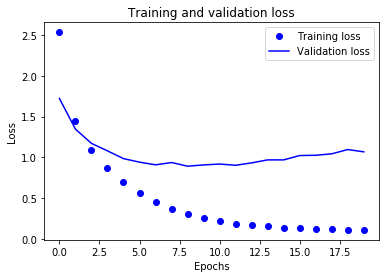

In [13]:
# Plot the training loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(range(len(loss_values)), loss_values, 'bo', label='Training loss')
plt.plot(range(len(val_loss_values)), val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

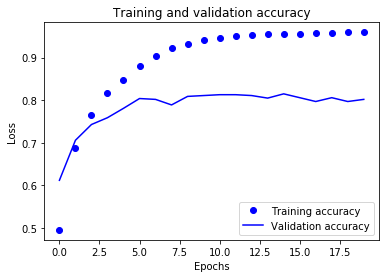

In [20]:
# Plot the training accuracy
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(range(len(acc_values)), acc_values, 'bo', label='Training accuracy')
plt.plot(range(len(val_acc_values)), val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Evaluate model on the test data
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

  32/2246 [..............................] - ETA: 0s

 288/2246 [==>...........................] - ETA: 0s

 576/2246 [======>.......................] - ETA: 0s

 864/2246 [==========>...................] - ETA: 0s

1152/2246 [==============>...............] - ETA: 0s

1504/2246 [===================>..........] - ETA: 0s

1824/2246 [=======================>......] - ETA: 0s



2144/2246 [===========================>..] - ETA: 0s

2246/2246 [==============================] - 0s 173us/step


[1.2092601870811102, 0.77871772044488397]
